<a href="https://colab.research.google.com/github/NihilisticMotif/CheCheConjecture/blob/main/Algorithm/SevenSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import time   # https://stackoverflow.com/questions/7370801/how-do-i-measure-elapsed-time-in-python

In [ ]:
SortingTime=[]

In [ ]:
Size=1000
Mean=0
Std=100

***
#Introduction

The goal of this documentation is to implement and compare the efficiency of 7 different sorting algorithms.
1. Bubble Sort
2. Insertion Sort
3. Selection Sort
4. Merge Sort
5. Quick Sort
6. Radix Sort
7. Heap Sort

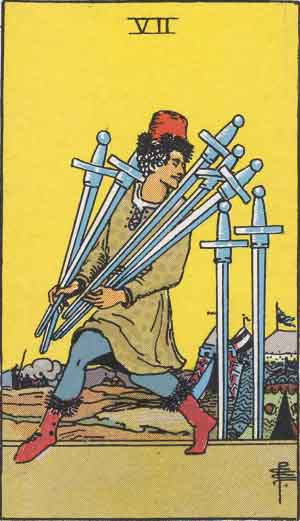

**About the Image**
* The title of the image is 7 swords. Also do not trust him. He won't sort the swords.
* https://en.wikipedia.org/wiki/Seven_of_Swords

***
#Bubble Sort

In [ ]:
def BubbleSort(ls):
  # Time: O(n^2)
  # Space: O(1)
  time=0
  for i in range(len(ls)):
    for j in range(len(ls)-i-1):
      # If the next element is greater than the current element.
      # then swap both of them.
      # In the first loop, the last element is sorted in correct order
      # so we have to repeat the process with one less element in each loop.
      if ls[j]>ls[j+1]:
        geq=ls[j]
        ls[j]=ls[j+1]
        ls[j+1]=geq
      time+=1
  return time

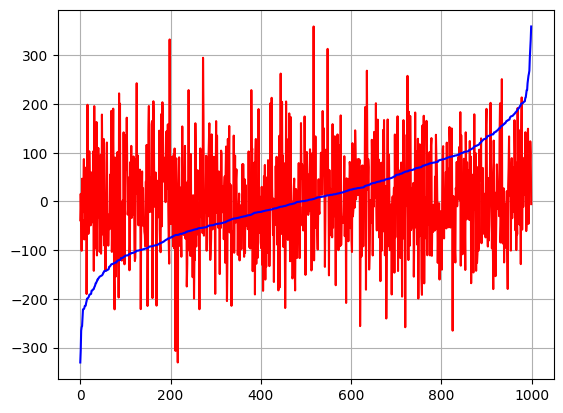

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=list(Random)
S1 = time.time()
Time=BubbleSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
SortingTime.append(["BubbleSort","n^2","1",Time,S1-S0])

***
#Insertion Sort

In [ ]:
def InsertionSort(ls):
  # Time: O(n^2)
  # Space: O(1)
  time=0
  for i in range(len(ls)):
    current=ls[i]
    j=i-1
    time+=j
    # compare the current element with all the previous element
    # if there is a previous element that greater than the current element
    # then swap a previous element and current element, then move to the next element.
    while(j>-1 and current <ls[j]):
      ls[j+1]=ls[j] # This line let's us swap the element.
      j-=1
    ls[j+1]=current
    time+=1
  return time

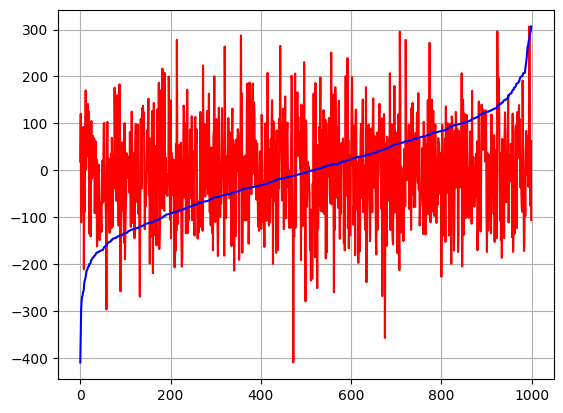

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
S0 = time.time()
Time=InsertionSort(Sort)
S1 = time.time()
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
Time

499500

In [ ]:
SortingTime.append(["InsertionSort","n^2","1",Time,S1-S0])

***
#Selection Sort

In [ ]:
def SelectionSort(ls):
  # Time: O(n^2)
  # Space: O(1)
  time=0
  for i in range(len(ls)):
    min=i
    next=i
    #for j in range(len(ls)-i):
    while(next<len(ls)):
      # If there exists the next element that is greater than
      # the current element, swap it.
      if ls[min]>ls[next]:
        min=next
      next+=1
      time+=1
    if(min!=i):
      current=ls[i]
      ls[i]=ls[min]
      ls[min]=current
    time+=1
  return time

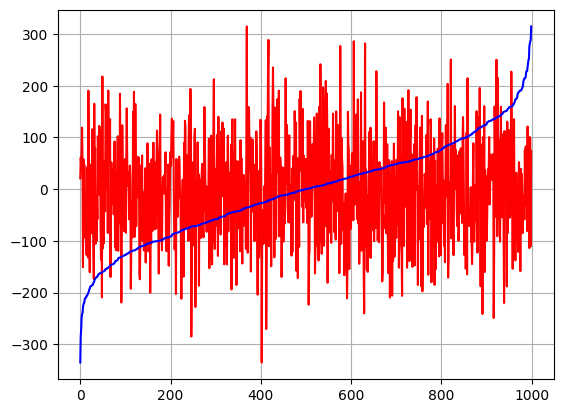

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=list(Random)
S1 = time.time()
Time=SelectionSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
Time

501500

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
SortingTime.append(["SelectionSort","n^2","1",Time,S1-S0])


***
#Merge Sort

##How does Merge Sort works?

1. It devides the list into smaller list with $O(\log(n))$ time and space complexity using `MergeSort(ls,Start=0,Stop=None) # Default Stop = len(ls)` and recursive call.
 * `ls = ` list or array
 * `Start = ` The first index of the array.
 * `Stop = ` The last index of the array.
 1. `[10,33,45,22,77,58,33]`
 1. `[10,33,45,22],[77,58,33]`
 1. `[10,33],[45,22],[77,58],[33]`
 1. `[10],[33],[45],[22],[77],[58],[33]`
2. Then it sorts each pair of smaller list using $O(n)$ time and space complexity using `Merge(ls,Start,Stop,Half)`
 * `Half = ` The last index of the left list and the first index of the right list.
 1. `[10],[33],[45],[22],[77],[58],[33]`
 1. `[10,33],[22,45],[58,77],[33]`
 1. `[10,22,33,45],[33,58,77]`
 1. `[10,22,33,33,45,58,77]`
3. The output is `[10,22,33,33,45,58,77]`.

##Complexity of Merge Sort
* Time complexity = $O(n\log(n))$ because the recursive call always balance and each recursive call use $O(n)$ time to sort the smaller list.
* Space complexity = $O(n)$ because it use $O(n)$ space for sort the smaller list. (Even through it use $O(\log(n))$ for each recursive call. $O(\log(n))$ is small compared to $O(n)$ when $n$ is large and it use only $O(n)$ space at a time.)

##Implementation

In [ ]:
def MergeSort(ls,Start=0,Stop=None):
  # Time: O(n log(n))
  # Space: O(n)
  # Recursive Time: O(log(n))
  # Recursive Space: O(log(n))
  if Stop==None:
    Stop=len(ls)
  if Start<Stop:
    # Separate the Array into 2 smaller array before sorting.
    Half=math.ceil((Stop+Start)/2)
    if len(ls[Start:Half])>1:
      MergeSort(ls,Start,Half)
    if len(ls[Half:Stop])>1:
      MergeSort(ls,Half,Stop)
    # Sorting the array.
    Merge(ls,Start,Stop,Half)

def Merge(ls,Start,Stop,Half):
    # Time: O(n)
    # Space: O(n)
    Left=ls[Start:Half]
    Right=ls[Half:Stop]
    l=0
    r=0
    i=Start
    while l<len(Left) and r<len(Right):
      if Left[l]>Right[r]:
        ls[i]=Right[r]
        r+=1
      else:
        ls[i]=Left[l]
        l+=1
      i+=1
    while l<len(Left):
      ls[i]=Left[l]
      l+=1
      i+=1
    while r<len(Right):
      ls[i]=Right[r]
      r+=1
      i+=1

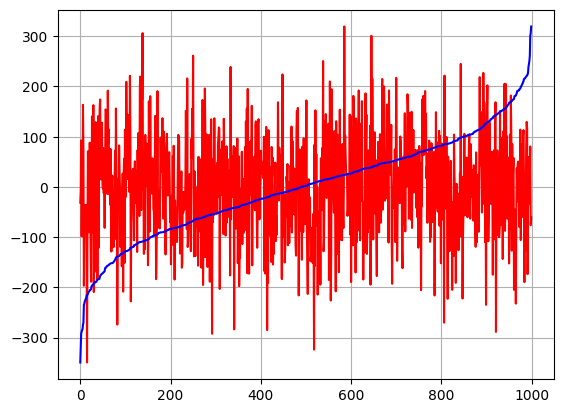

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
MergeSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

##Time Evaluation

In [ ]:
def MergeSort(ls,Start=0,Stop=None,time=0):
  # Time: O(n log(n))
  # Space: O(n)
  # Recursive Time: O(log(n))
  # Recursive Space: O(log(n))
  if Stop==None:
    Stop=len(ls)
  if Start<Stop:
    Half=math.ceil((Stop+Start)/2)
    if len(ls[Start:Half])>1:
      time+=MergeSort(ls,Start,Half)
    if len(ls[Half:Stop])>1:
      time+=MergeSort(ls,Half,Stop)
    time+=Merge(ls,Start,Stop,Half)
  return time

def Merge(ls,Start,Stop,Half):
    # Time: O(n)
    # Space: O(n)
    Left=ls[Start:Half]
    Right=ls[Half:Stop]
    l=0
    r=0
    i=Start
    time=0
    while l<len(Left) and r<len(Right):
      if Left[l]>Right[r]:
        ls[i]=Right[r]
        r+=1
      else:
        ls[i]=Left[l]
        l+=1
      i+=1
      time+=1
    while l<len(Left):
      ls[i]=Left[l]
      l+=1
      i+=1
      time+=1
    while r<len(Right):
      ls[i]=Right[r]
      r+=1
      i+=1
      time+=1
    return time

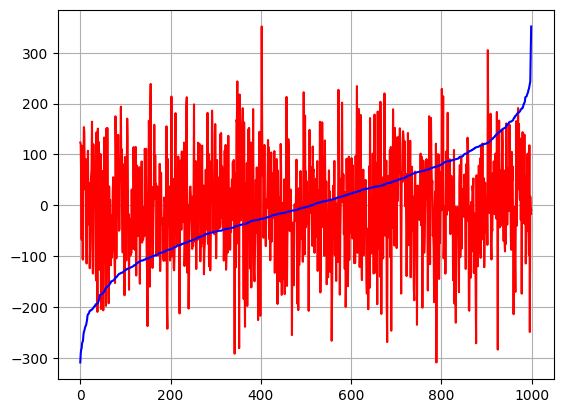

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=list(Random)
S1 = time.time()
Time=MergeSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
print(Time)

9976


In [ ]:
SortingTime.append(["MergeSort","n log(n)","n",Time,S1-S0])

***
#Quick Sort

##How does Quick Sort works?

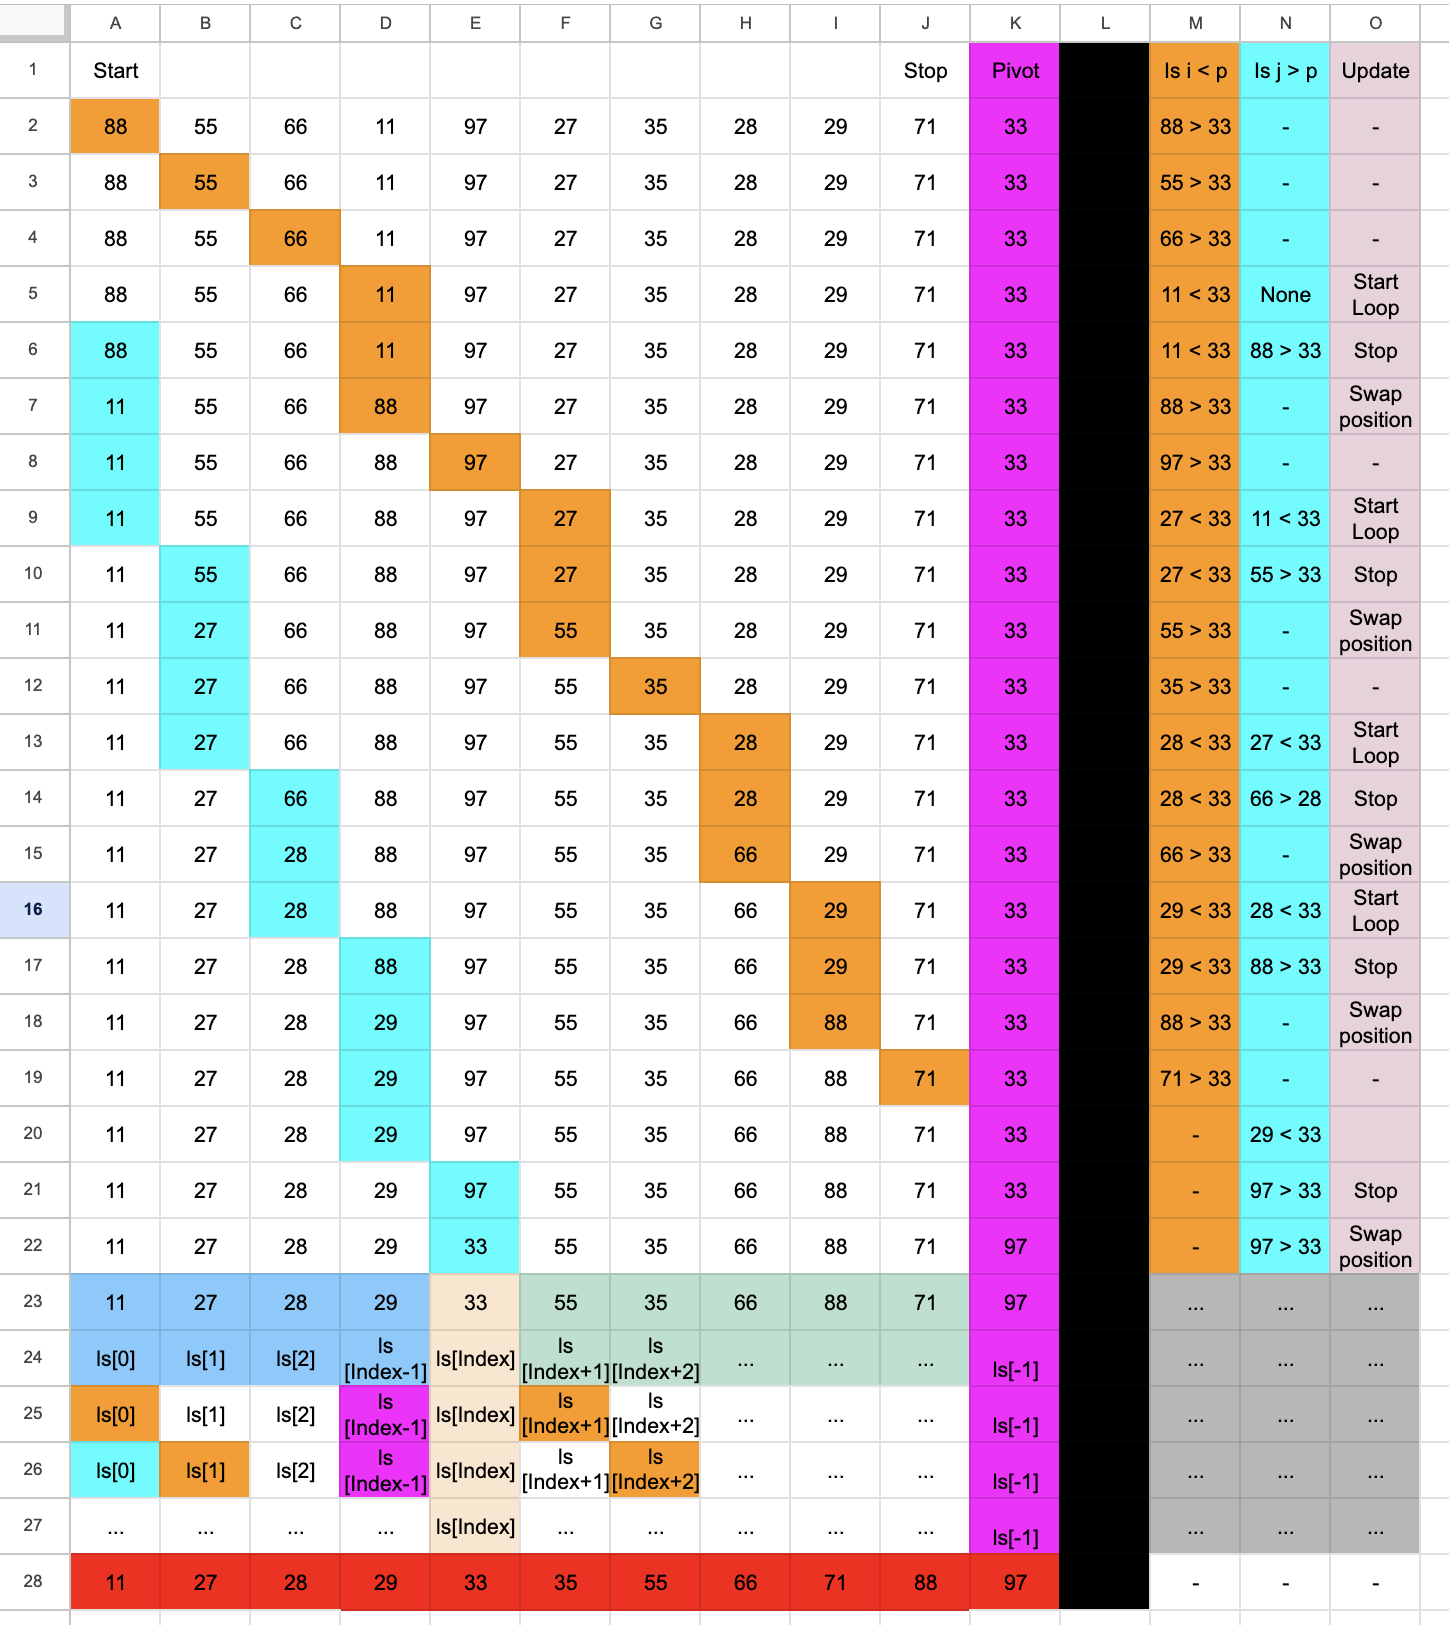

##About the Image
* This image shows how Quick Sort works.
1. Activate `Partition(ls,Start,Stop)` with $O(n)$ time and $O(1)$ space complexity.
1. `Partition` randomly select the element of the list, swap the value of `ls[Rand]` and `ls[Stop]`, then set `ls[Stop]` as `Pivot`
2. Then `Partition` find the $i-$th element that $<$ `Pivot`.
3. `Partition` will finds $j-$th element that $>$ `Pivot`.
4. Given that `ls[i]<Pivot` and `ls[j]>Pivot` and `j<=i`, When the value of `ls[i]` and `ls[j]` are swapped, the value becomes `ls[j] < Pivot < ls[i]`
5. After `i+=1` $\implies$ `ls[i] = Pivot`, it find `ls[j]` such that `ls[j] > ls[i]`.
6. Swap value of `ls[j]` and `ls[i]`.
7. Using recursive call with `QuickSort(ls,Start,Index-1)` and `QuickSort(ls,Index+1,Stop)` to repeat the process with $O(\log(n)$ to $O(n)$ time and space complexity.

##In this case
* `input_list==[88,55,66,11,97,27,35,28,29,71,33]`
* `QuickSort(input_list)==[11,27,28,29,33,35,55,66,71,88,97]`

##Note
* During the loop, the value of $j\leq i$.
* After apply `Partition(ls,Start,Stop)`, every value before `ls[j]` is less than `ls[j]` and every value after `ls[j]` is greater than `ls[j]`. Thus `ls[j]` is sorted in the correct position.

##Complexity of Quick Sort
* Space and Time Complexity of Recursive call = $O(\log(n))-O(n)$. In most case, the recursive tree is balance and the recursive call have $O(\log(n))$ complexity (both time and space). The only time when recursive tree is not balance is when the pivot (selected) value is the least and the greatest value among the list, which make the complexity becomes $O(n)$. In order to prevent this problem, we can randomly select the pivot value, so that the chance that we accidently select the greatest or the least value pivot is lower.
* Space Complexity of `Partition(ls,Start,Stop)` = $O(1)$
* Time Complexity of `Partition(ls,Start,Stop)` = $O(n)$ for linear loops.
* Total Time = $O(n\log(n)) - O(n^2)$
* Space Time = $O(\log(n)) - O(n)$

**Reference**
* https://docs.google.com/spreadsheets/d/1aj_oPvSGaEu7xQ1nJZqbKaoEOJeC7k8dJiH6mEBPR3M/edit?usp=sharing
* https://youtu.be/Vtckgz38QHs?si=oueNy6ioHJ3aIHxy
* https://www.geeksforgeeks.org/time-and-space-complexity-analysis-of-quick-sort/

##Implementation

In [ ]:
def QuickSort(ls,Start=0,Stop=None):
  # Time: O(n log(n)) - O(n^2)
  # Space: O(log(n)) - O(n)
  if Stop==None:
    Stop=len(ls)-1
  if Start<Stop:
    Index=Partition(ls,Start,Stop)
    QuickSort(ls,Start,Index-1)
    QuickSort(ls,Index+1,Stop)

def Partition(ls,Start=0,Stop=None):
  # Time: O(n)
  # Space: O(1)
  if Stop==None:
    Stop=len(ls)-1
  # 1. Randomly Select Pivot, so that there is less chance that the recursive tree is unbalance.
  Random=np.random.randint(Start,Stop,1)[0]
  temp=ls[Stop]
  ls[Stop]=ls[Random]
  ls[Random]=temp
  Pivot=ls[Stop]
  i=Start
  j=Start
  # 2. Loop and swap the value of ls[i] and ls[j]
  # So that some greater values are put the next after the previous value.
  # Start =< j =< i =< Stop-1
  while i<=Stop:
    if ls[i]<Pivot:
      while j<i and ls[j]<=Pivot:
        j+=1
      if ls[j]>Pivot:
        Temp=ls[i]
        ls[i]=ls[j]
        ls[j]=Temp
    i+=1
  i-=1
  # 3. Find the position of pivot.
  while j<i and ls[j]<Pivot:
    j+=1
  Temp=ls[i]
  ls[i]=ls[j]
  ls[j]=Temp
  return j

In [ ]:
ls=[88,55,66,11,97,27,35,28,29,71,330,44]
QuickSort(ls)
print(ls)

[11, 27, 28, 29, 35, 44, 55, 66, 71, 88, 97, 330]


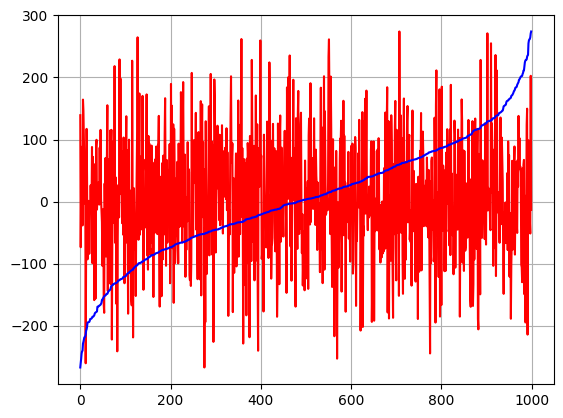

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
QuickSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

##Time Evaluation

In [ ]:
def QuickSort(ls,Start=0,Stop=None,time=1):
  # Time: O(n log(n)) - O(n^2)
  # Space: O(log(n)) - O(n)
  if Stop==None:
    Stop=len(ls)-1
  if Start<Stop:
    Index=Partition(ls,Start,Stop)
    time+=Index[1]
    Index=Index[0]
    time+=QuickSort(ls,Start,Index-1,1)
    time+=QuickSort(ls,Index+1,Stop,1)
  return time

def Partition(ls,Start=0,Stop=None,time=1):
  # Time: O(n)
  # Space: O(1)
  if Stop==None:
    Stop=len(ls)-1
  Random=np.random.randint(Start,Stop,1)[0]
  temp=ls[Stop]
  ls[Stop]=ls[Random]
  ls[Random]=temp
  Pivot=ls[Stop]
  i=Start
  j=Start
  while i<=Stop:
    if ls[i]<Pivot:
      while j<i and ls[j]<=Pivot:
        j+=1
        time+=1
      if ls[j]>Pivot:
        Temp=ls[i]
        ls[i]=ls[j]
        ls[j]=Temp
    i+=1
    time+=1
  i-=1
  while j<i and ls[j]<Pivot:
    j+=1
    time+=1
  Temp=ls[i]
  ls[i]=ls[j]
  ls[j]=Temp
  return (j,time)


In [ ]:
ls=[88,55,66,11,97,27,35,28,29,71,330,44]
Time=QuickSort(ls,1)
print(ls)
print(Time)

[88, 11, 27, 28, 29, 35, 44, 55, 66, 71, 97, 330]
66


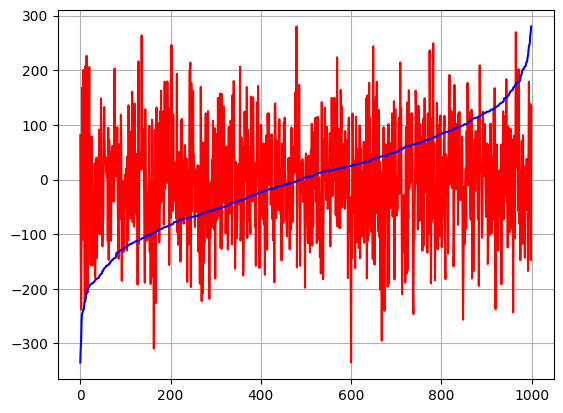

In [ ]:
import time

X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=list(Random)
S1 = time.time()
Time=QuickSort(Sort,0,None,1)
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
print(Time)

20163


In [ ]:
SortingTime.append(["QuickSort","n log(n) - n^2","log(n) - n",Time,S1-S0])

#Merge Sort vs Quick Sort

##Divide and Conquer

Divide and Conquer is a problem-solving strategy that involves breaking down a complex problem into smaller, more manageable parts, solving each part individually, and then combining the solutions to solve the original problem. (https://www.geeksforgeeks.org/divide-and-conquer/ ) The example of algorithms that utilize this technique are Merge Sort and Quick Sort, because both algorithm separate the list into multiple smaller lists with $O(\log(n))$ time, rearranging the smaller lists with $O(n)$ time and combine the smaller lists with $O(\log(n))$ time. In this case it help this algorithms sorting list with $O(n\log(n))$ time complexity which is faster compared to other sorting algorithm that use $O(n^2)$.

##Different between Merge Sort and Quick Sort

**Merge Sort**
* Time: $O(n\log(n))$
* Space: $O(n)$
* Merge Sort always recursively devide the lists in half in $O(\log(n))$ time and space, and sorting the smaller lists with $O(n)$ time and space.

**Quick Sort**
* Time: $O(n\log(n))-O(n^2)$
* Space: $O(\log(n))-O(n)$
* Quick Sort select the last element of the list as Pivot, rearrange the lists and swap the position of a specific element and Pivot, such that all of the element before Pivot is less than or equal to the Pivot and the element that comes after the Pivot is larger than or equal to the Pivot. This process use $O(n)$ time. Then It recursively devide the lists in to 2 lists, which are the lists of the element before and After Pivot. It repeat the process. The recursive tree of the QuickSort does not always balance which make it use $O(n\log(n))-O(n^2)$ time. QuickSort does not use any extra space, except using the $O(\log(n))-O(n)$ space for recursive call.



***
#Radix Sort

In [ ]:
def RadixSort(ls):
  # Time: O(n*k)
  # Space: O(n)
  # https://youtu.be/XiuSW_mEn7g?si=7HX8g9ft4skwGZbP
  time=0
  N=[]
  P=[]
  for i in ls:
    time+=1
    if i<0:
      N.append(abs(i))
    else:
      P.append(abs(i))
  nls=[]
  if len(N)>0:
    N=Radix(N)
    time+=N[1]
    N=N[0]
    for i in range(len(N)):
      time+=1
      nls.append(-1*N[len(N)-i-1])
  pls=[]
  if len(P)>0:
    P=Radix(P)
    time+=P[1]
    P=P[0]
  pls=P
  return (nls+pls,time)

In [ ]:
def Radix(ls):
  # Time: O(n*k)
  # Space: O(n)
  # https://youtu.be/XiuSW_mEn7g?si=7HX8g9ft4skwGZbP
  time=0
  Fraction=0
  Decimal=0
  # Convert Number to String
  for i in range(len(ls)):
    time+=1
    if '.' not in str(ls[i]):
      ls[i]=str(abs(ls[i]))+'.0'
    else:
      ls[i]=str(abs(ls[i]))
  # Finding the number of all required decimal.
  for i in range(len(ls)):
    time+=1
    ls[i]=ls[i].split('.')
    if Fraction<len(ls[i][1]):
      Fraction=len(ls[i][1])
    if Decimal<len(ls[i][0]):
      Decimal=len(ls[i][0])
  # Convert number to string
  for i in range(len(ls)):
    time+=1
    if len(ls[i][1])<Fraction:
      zero=''
      for z in range(Fraction-len(ls[i][1])):
        time+=1
        zero+='0'
      ls[i][1]+=zero
    if len(ls[i][0])<Decimal:
      zero=''
      for z in range(Decimal-len(ls[i][0])):
        time+=1
        zero+='0'
      ls[i][0]=zero+ls[i][0]
  # Concat
  for i in range(len(ls)):
    time+=1
    ls[i]=ls[i][0]+'.'+ls[i][1]
  # Sorting the number
  for d in range(Fraction+Decimal+1):
    time+=1
    #     [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Space=[[],[],[],[],[],[],[],[],[],[]]
    for i in ls:
      time+=1
      if i[int(len(i)-d-1)]!='.':
        Space[int(i[int(len(i)-d-1)])].append(i)
      else:
        break
    if ls[0][int(len(i)-d-1)]!='.':
      time+=1
      ss=[]
      for s in Space:
        time+=1
        ss+=s
      ls=ss
    else:
      continue
  # convert string to float
  for i in range(len(ls)):
    time+=1
    ls[i]=float(ls[i])
  return (ls,time)

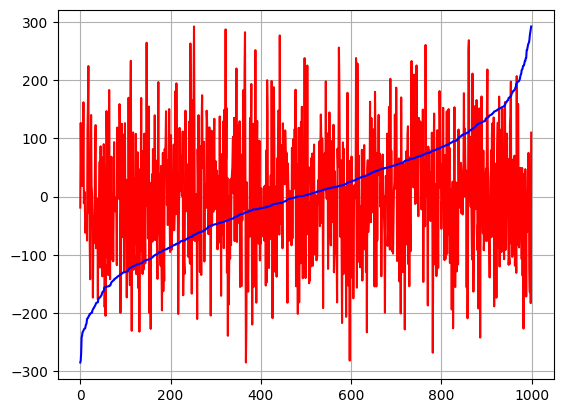

In [ ]:
import time

X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=RadixSort(list(Random))
S1 = time.time()
Time=Sort[1]
Sort=Sort[0]
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
SortingTime.append(["RadixSort","n * k","n",Time,S1-S0])

***
#Heap Sort

***
##Introduction of Heap

* Graph = a diagram that consists of points (node or vertices) and lines (links or edges) which represents the relationship between points.
* Tree = a graph that looks like a tree. It is an undirected graph in which any two vertices are connected by exactly one path, or equivalently a connected acyclic undirected graph. (https://en.wikipedia.org/wiki/Tree_(graph_theory))
* Binary Tree = a tree in which every parents have 0-2 childrens.
* Heap = a special type of binary tree in which the parents always have value greater (max heap) or smaller (min heap) than its childrens. It can be represented as Array
***

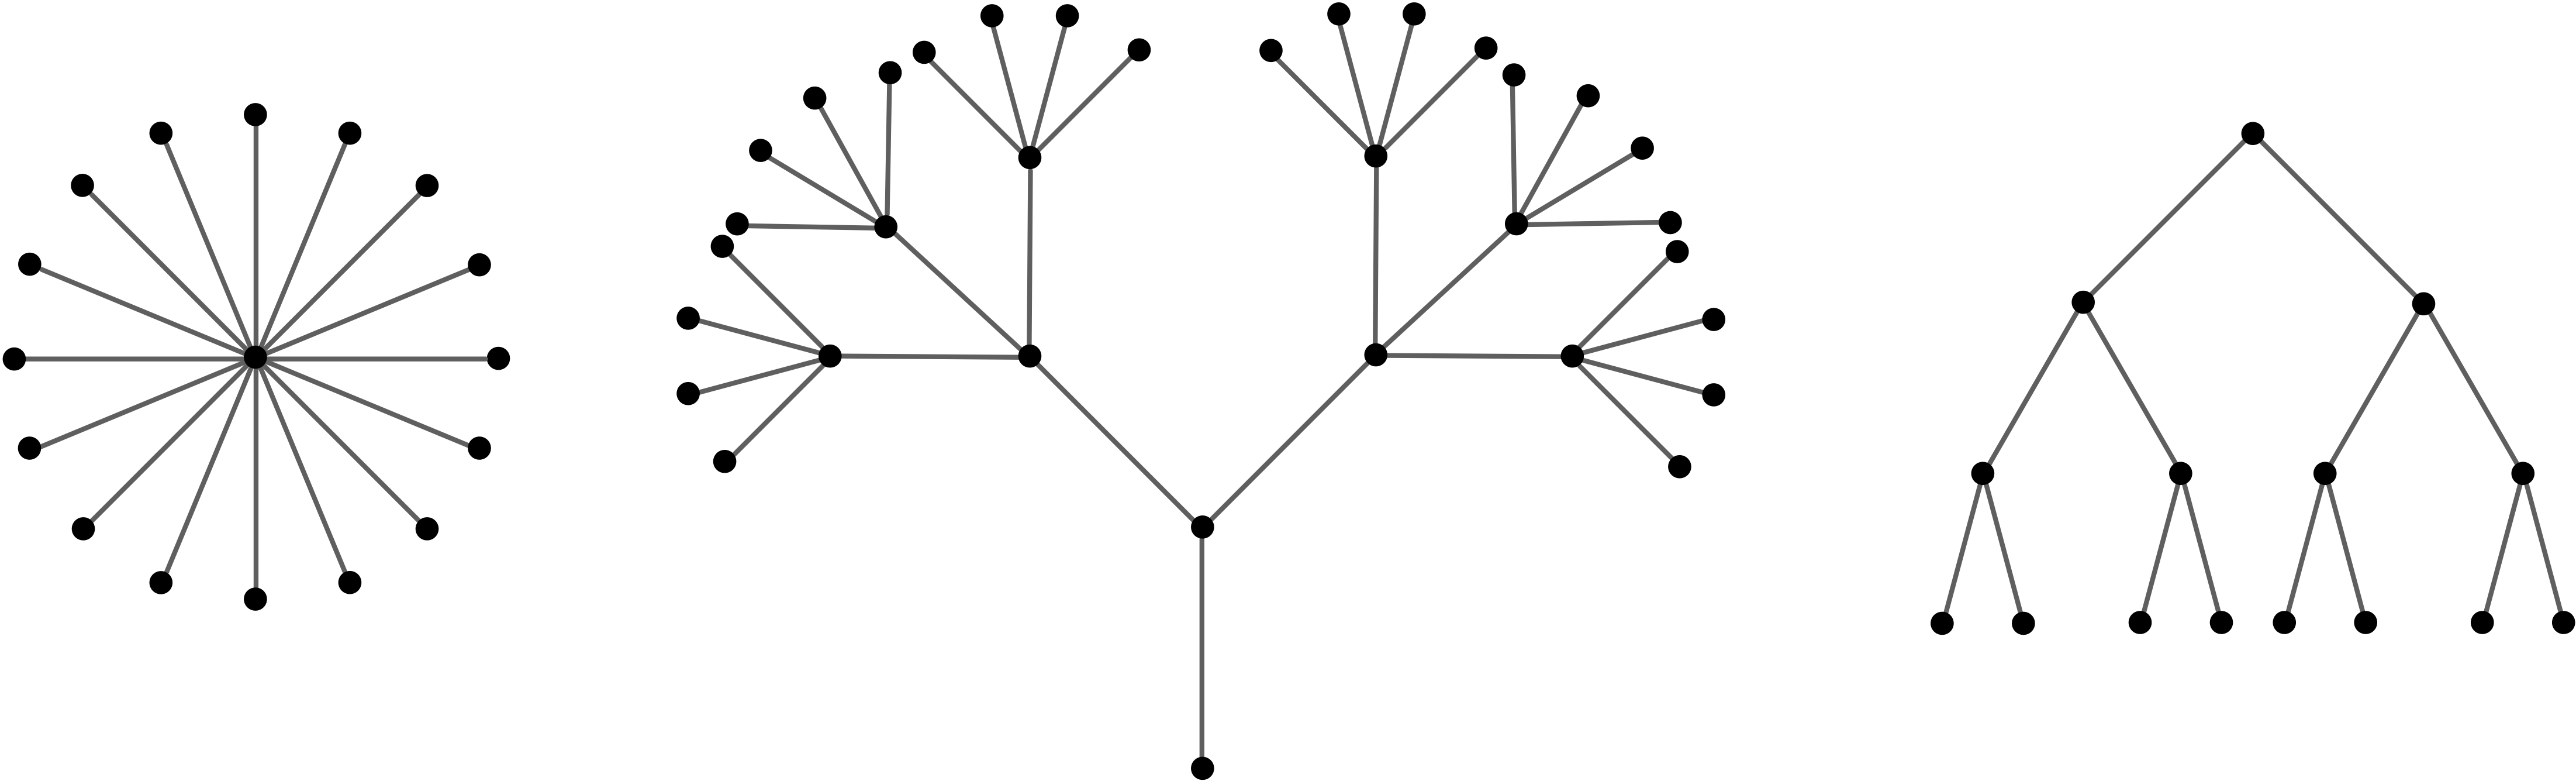

**About the Image**
* This is tree.
* The leftmost tree is a binary tree.
* https://ptwiddle.github.io/Graph-Theory-Notes/s_intro_trees.html
***

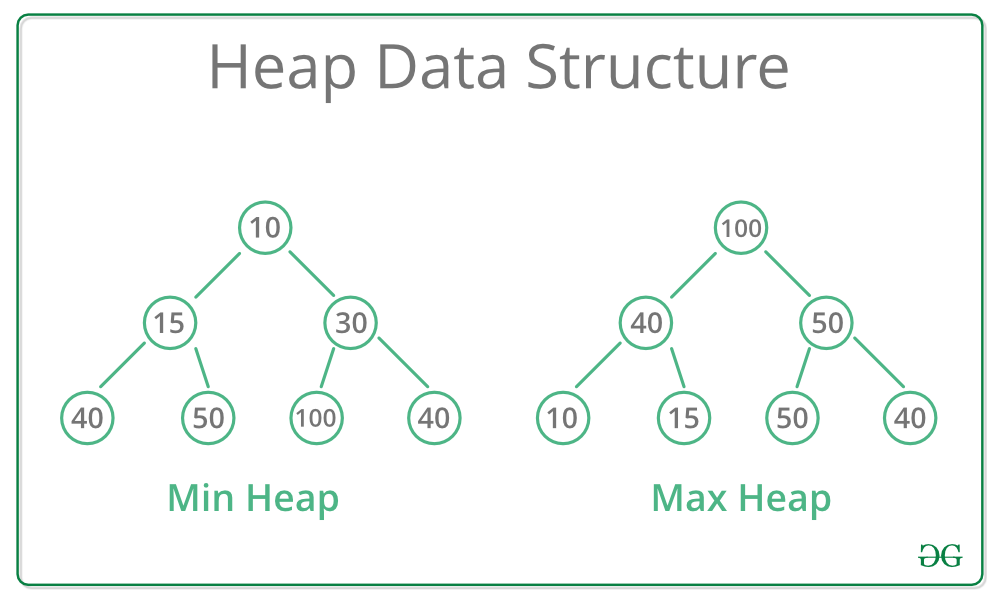

**About the Image**
* This is heap.
* `MinHeap=[10,15,30,40,50,100,40]`
* `MaxHeap=[100,40,50,10,15,50,40]`
* https://www.geeksforgeeks.org/heap-data-structure/

***
##Convert List to Heap

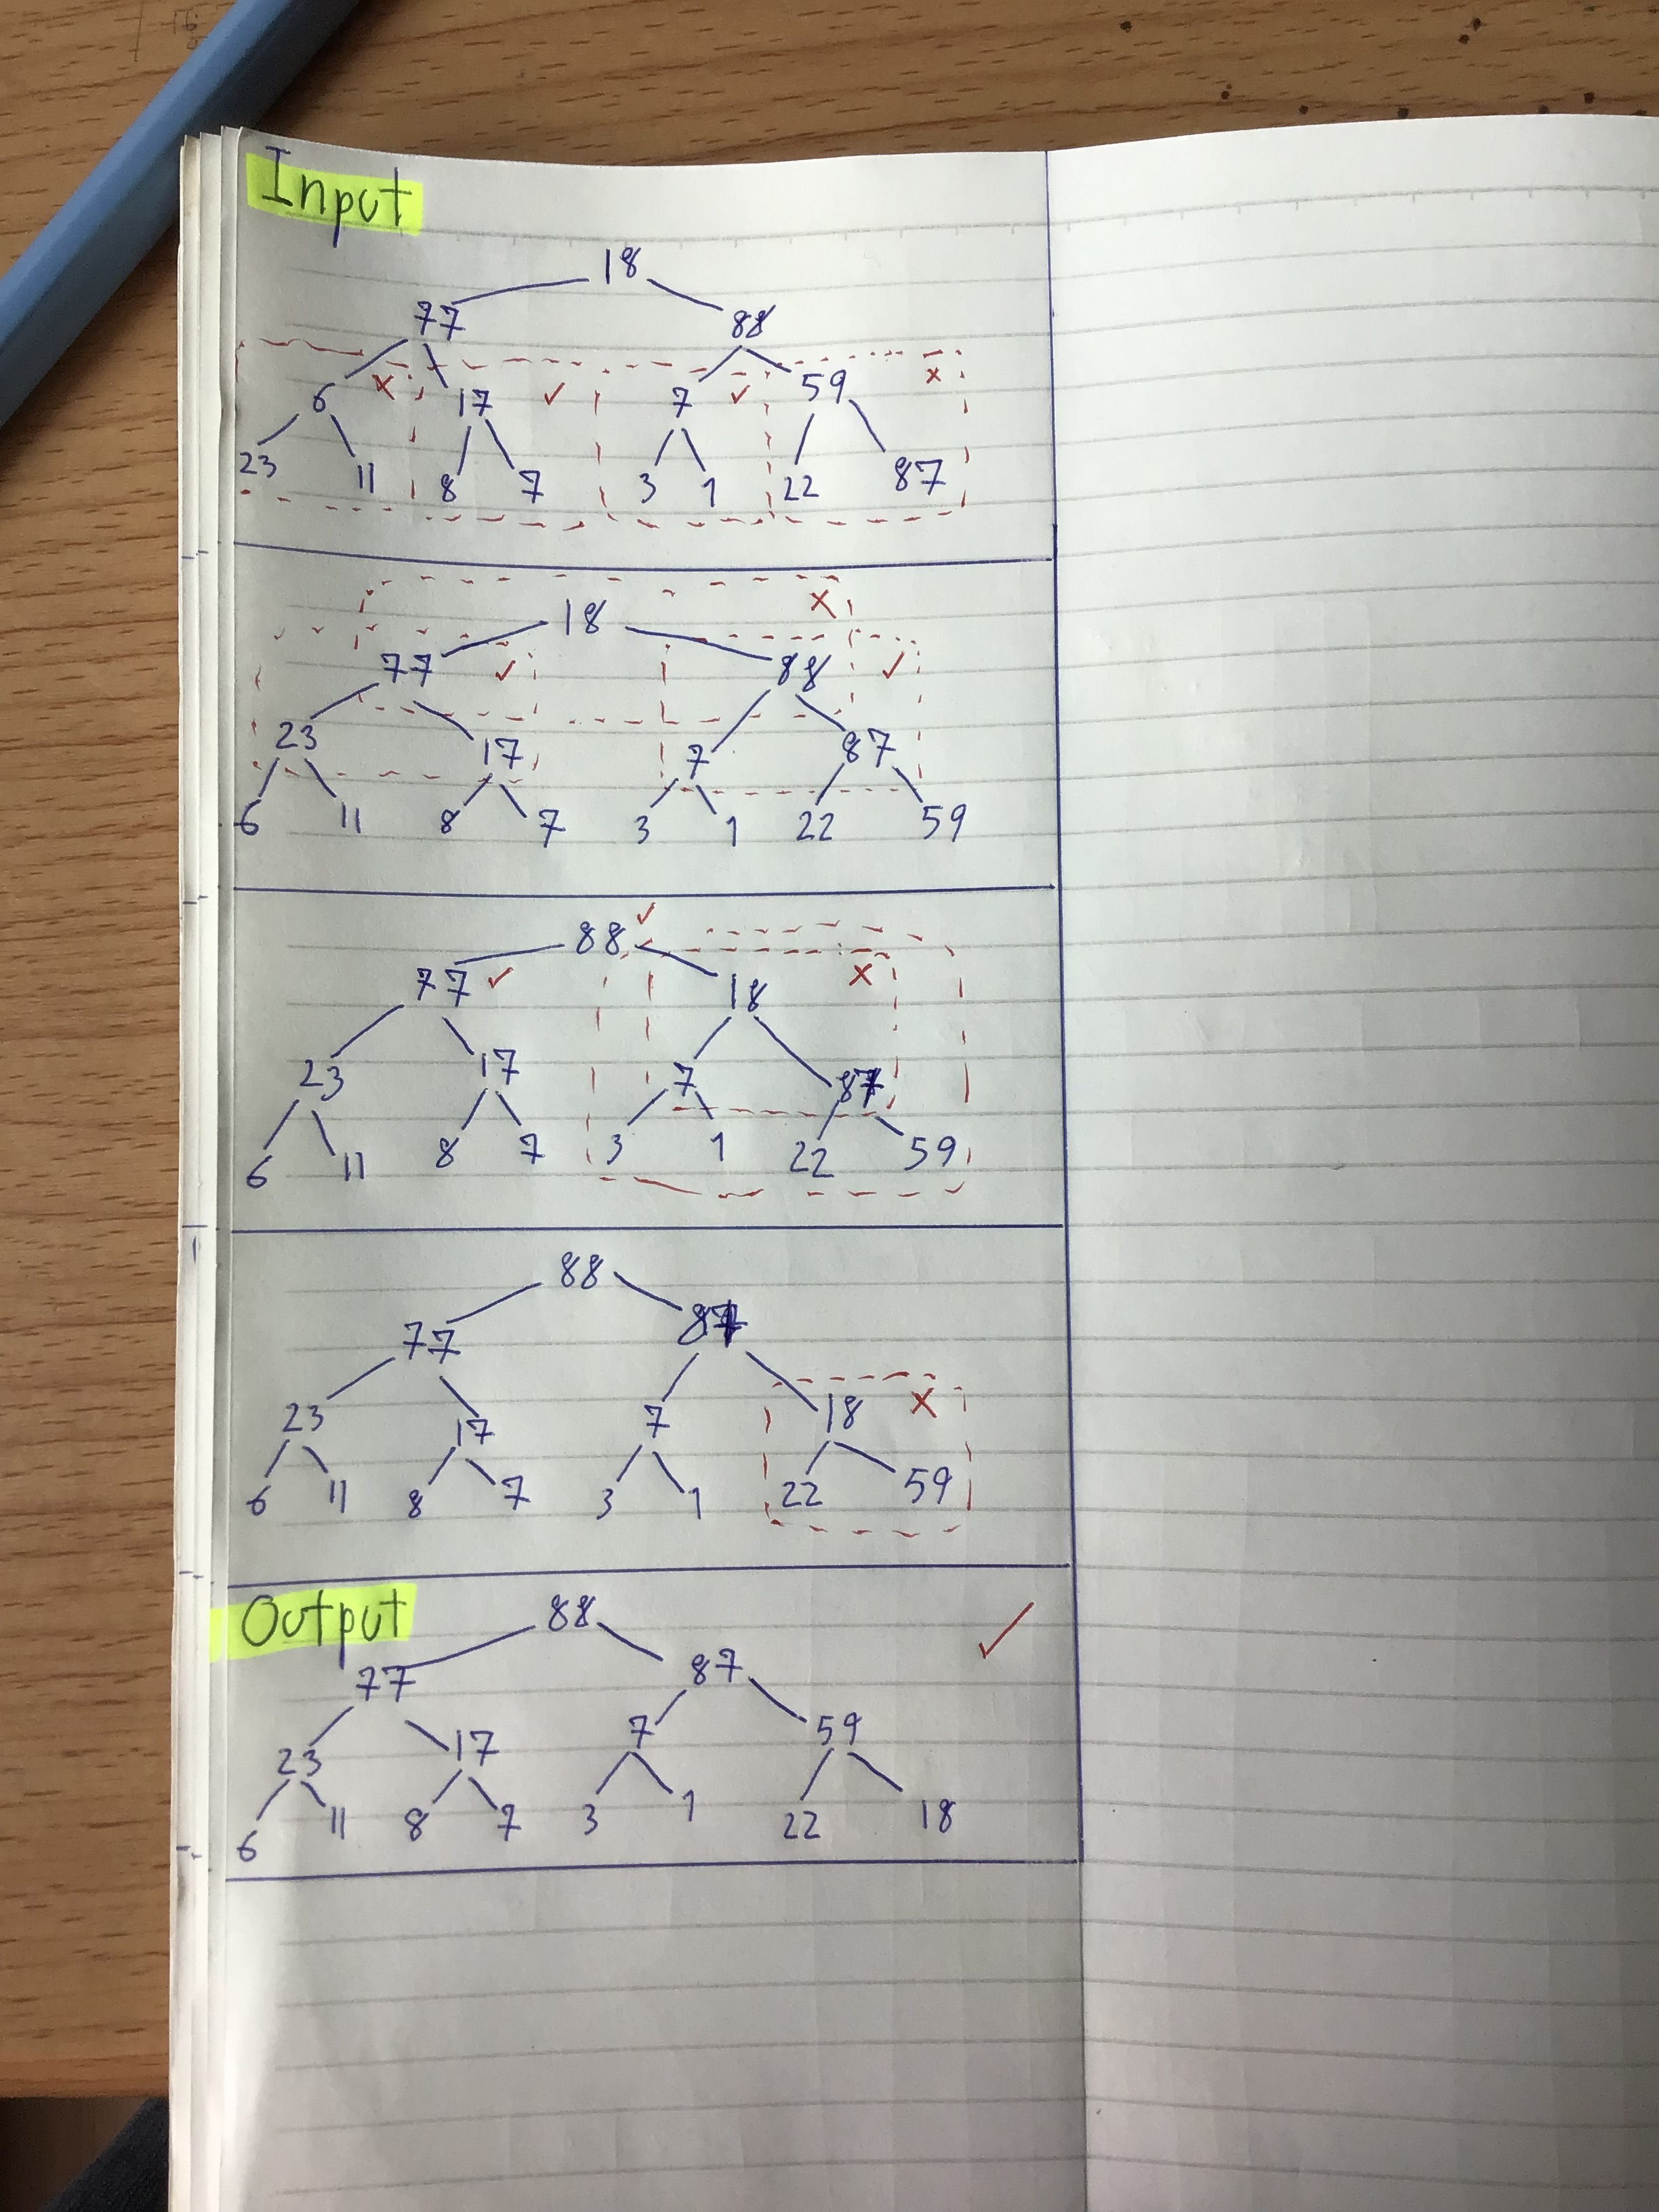

###How does Heapify works?
1. Activating `MaxHeapify(ls)` where `ls` is the input list.
1. It find the last node that has children (or a child). using `ParentId(ls,len(ls)-1)` with $O(1)$ time and space.
2. It loop and edit the list through each parent node, such that the `ls` satisfy with the condition of Max-Heap. In each function use `OlogMaxHeap(ls,Parent)`.
3. If the children parent node have their own children, then recursively call `OlogMaxHeap(ls,Parent)` which use $O(\log(n))$ time and $O(1)$ space, in order to edit all of the children and grand children of that parent.
4. The last `Parent` to edit is `ls[0]`. After that the task of `MaxHeapify(ls)` is complete.

###Complexity of Heapify
* Space = $O(1)$
* Time = $O(n)$ because for a large input $n$, the total iteration and the number of all node can be approximated as $2^h$ where $h=$ height of the tree, thus the time complexity is $O(n)$

###About the Image
* This diagram show how to build heap with $O(n)$ time.
* In this case, the output is Max heap.
* Building min heap required the same algorithm with minor change.

###In this case
* `input_arr == [18,77,88, 6,17, 7,59,23,11, 8, 7, 3, 1,22,87]`
* `MaxHeapify ==[88,77,87,23,17, 7,59, 6,11, 8, 7, 3, 1,22,18]`

###Other Examples
* https://www.geeksforgeeks.org/building-heap-from-array/

***
###Evaluating Time Complexity

Define
* Suppose that there are $2^h-1$ node in a heap.
* $n=$ number of all node
* $O(n)=$ time complexity
* $o=$ number of iteration
* $h=$ height of the tree

Total Node
* $n=\Sigma_{i=0}^{h-1}2^i=2^h-1$

Total Iteration
* $o=\Sigma_{i=0}^{h-1}2^i(h-i)$
* $o=2^0h+2^1(h-1)+...+2^{h-2}(h-h+2)+2^{h-1}(h-h+1)$
* $o=h+2(h-1)+...+2^{h-2}(2)+2^{h-1}$
* $o=h+2(h-1)+...+2^{h-1}+2^{h-1}$
* $o=h+2(h-1)+...+2^h$

According to Big O: $O_1(n)\leq O_2(n)\implies O_1(n)+O_2(n)\approx O_2(n)$

Implies that
* $n=\Sigma_{i=0}^{h-1}2^i=2^h-1\approx 2^h$
* $o=\Sigma_{i=0}^{h-1}2^i(h-i)\approx 2^h\approx n$

Therefore
* $\therefore $ Time complexity of Build Min-Max Heap $=O(n)$

Reference
* https://www.geeksforgeeks.org/time-complexity-of-building-a-heap/




###`ReturnLeaf(ls)`

In [ ]:
def ReturnLeaf(ls):
  # Time: O(1)
  # Space: O(n)
  n=len(ls)
  if n%2==0:
    count=int(n/2)
    leafs=ls[count:]
    return (count,leafs)
  else:
    count=int((n+1)/2)
    leafs=ls[count:]
    return (count,leafs)

ls=[0,1,2,3,4,5,6,7]
print(ReturnLeaf(ls))

(4, [4, 5, 6, 7])


###`SingleHeap(ls,index)`

In [ ]:
def SingleHeap(ls,index):
  # In this case, it is Max Heapify.
  # Time: O(1)
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  if Ch1<len(ls) and Ch2>=len(ls):
    if ls[Ch1]<ls[index]:
      return
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      return
  # 2 Children
  if Ch2<len(ls):
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      return
    elif ls[Ch1]>ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      return
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      return
    else:
      return
  # No Children
  return

In [ ]:
ls=[0,1,2,3,4,5,6,7]
SingleHeap(ls,0)
print(ls)
# [2,1,0,3,4,5,6,7]
ls=[0,1,2,3,4,5,6,7]
SingleHeap(ls,3)
print(ls)
# [0,1,2,7,4,5,6,3]
ls=[0,1,2,3,4,5,6,7]
SingleHeap(ls,4)
print(ls)
# [0,1,2,3,4,5,6,7]
ls=[0,1,2,3,4,5,6,7]
SingleHeap(ls,41)
print(ls)
# [0,1,2,3,4,5,6,7]

[2, 1, 0, 3, 4, 5, 6, 7]
[0, 1, 2, 7, 4, 5, 6, 3]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]


###`LimitHeap(ls,index,limit)`

In [ ]:
def LimitHeap(ls,index,limit=0):
  # In this case, it is Max Heapify.
  # Time: O(1)
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  LastNode=len(ls)-limit
  if Ch1<LastNode and Ch2>=LastNode:
    if ls[Ch1]<ls[index]:
      return
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      return
  # 2 Children
  if Ch2<LastNode:
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      return
    elif ls[Ch1]>ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      return
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      return
    else:
      return
  # No Children
  return

In [ ]:
ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,3)
if ls==[0,1,2,7,4,5,6,3]:
  print('T')
else:
  print('F')

ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,3,1)
if ls==[0,1,2,3,4,5,6,7]:
  print('T')
else:
  print('F')

ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,2,2)
if ls==[0,1,5,3,4,2,6,7]:
  print('T')
else:
  print('F')

ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,2,1)
if ls==[0,1,6,3,4,5,2,7]:
  print('T')
else:
  print('F')

ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,1,1)
if ls==[0,4,2,3,1,5,6,7]:
  print('T')
else:
  print('F')

ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,1,4)
if ls==[0,3,2,1,4,5,6,7]:
  print('T')
else:
  print('F')

T
T
T
T
T
T


###`LogHeap(ls,index,limit)`

In [ ]:
def LogHeap(ls,index,limit=0):
  # In this case, it is Max Heapify.
  # Time: O(log(n))
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  LastNode=len(ls)-limit
  if Ch1<LastNode and Ch2>=LastNode:
    if ls[Ch1]<ls[index]:
      pass
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
  # 2 Children
  elif Ch2<LastNode:
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      pass
    elif ls[Ch1]>=ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      LogHeap(ls,Ch1,limit)
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      LogHeap(ls,Ch2,limit)
    else:
      pass
  # No Children
  else:
    pass

In [ ]:
ls=[0,1,2,3,4,5,6,7]
LogHeap(ls,1)
print(ls)

[0, 4, 2, 3, 1, 5, 6, 7]


In [ ]:
ls=[0,1,2,3,4,5,6,7]
LimitHeap(ls,0)
print(ls)

[2, 1, 0, 3, 4, 5, 6, 7]


In [ ]:
A=[
    [2,1,6,3,4,5,0,7], # 0
    [2,1,0,3,4,5,6,7], # 1
    [2,1,5,3,4,0,6,7], # 2
    [0,4,2,3,1,5,6,7], # 3
    [0,4,2,3,1,5,6,7], # 4
    [0,1,6,3,4,5,2,7], # 5
    [0,1,6,3,4,5,2,7], # 6
    [0,4,2,3,1,5,6,7], # 7
    [0,1,2,3,4,5,6,7], # 8
    [0,1,2,3,4,5,6,7], # 9
    [0,1,2,3,4,5,6,7], # 10
]
#     [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
index=[ 0, 0, 0, 1, 1, 2, 2, 1, 4, 3, 5]
limit=[ 0, 3, 2, 2, 1, 0, 1, 0, 0, 1, 0]
ii=0
for a,i,l in zip(A,index,limit):
  ls=[0,1,2,3,4,5,6,7]
  LogHeap(ls,i,l)
  state='F '
  if ls==a:
    state='T '
  print(state+str(ii))
  ii+=1


T 0
T 1
T 2
T 3
T 4
T 5
T 6
T 7
T 8
T 9
T 10


###`BecomingTheLastNames(ls)`

In [ ]:
def BecomingTheLastNames(ls):
  # https://youtu.be/zsiJ4Hfx_sI?si=Uj_O6ikieXEMSfQa
  # Time: O(1)
  # Space: O(1)
  leafs=int(len(ls)/2)
  if len(ls)%2==1:
    leafs=int((len(ls)+1)/2)
  return len(ls)-leafs

###`Heapify(ls)`

In [ ]:
def Heapify(ls):
  # Time: O(n)
  # Space: O(1)
  # The time complexity is O(n) because for large number input
  # the number of total iterations and input can be approximated as 2^h
  # where h = height. Thus the time complexity is linear.
  Parent=BecomingTheLastNames(ls)
  while Parent>-1:
    LogHeap(ls,Parent)
    Parent-=1

In [ ]:
ls=[0,1,2,3,4,5,6,7]
Heapify(ls)
print(ls)

[7, 4, 6, 3, 0, 5, 2, 1]


###Time Evaluation of `Heapity(ls)`

In [ ]:
def BecomingTheLastNames(ls):
  # https://youtu.be/zsiJ4Hfx_sI?si=Uj_O6ikieXEMSfQa
  # Time: O(1)
  # Space: O(1)
  leafs=int(len(ls)/2)
  if len(ls)%2==1:
    leafs=int((len(ls)+1)/2)
  return len(ls)-leafs

In [ ]:
def LogHeap(ls,index,limit=0,time=1):
  # In this case, it is Max Heapify.
  # Time: O(log(n))
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  LastNode=len(ls)-limit
  if Ch1<LastNode and Ch2>=LastNode:
    if ls[Ch1]<ls[index]:
      pass
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
    return time
  # 2 Children
  elif Ch2<LastNode:
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      pass
    elif ls[Ch1]>=ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      time+=LogHeap(ls,Ch1,limit)
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      time+=LogHeap(ls,Ch2,limit)
    else:
      pass
    return time
  # No Children
  else:
    return time

In [ ]:
def Heapify(ls):
  # Time: O(n)
  # Space: O(1)
  # The time complexity is O(n) because for large number input
  # the number of total iterations and input can be approximated as 2^h
  # where h = height. Thus the time complexity is linear.
  Parent=BecomingTheLastNames(ls)
  time=Parent
  while Parent>-1:
    time+=LogHeap(ls,Parent)
    Parent-=1
  return time

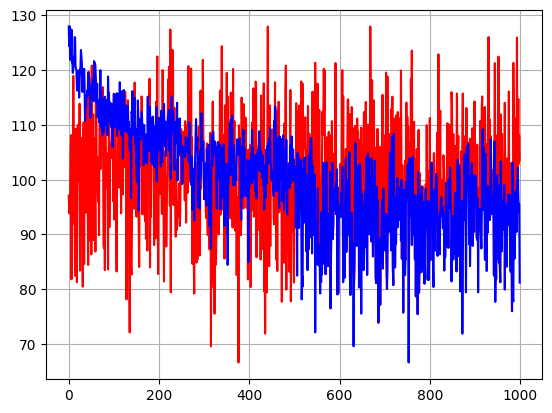

In [ ]:
import time

X=np.arange(0,Size,1)
Random = np.random.normal(100,10,Size)
plt.plot(X,Random,color='red')
S0 = time.time()
Sort=list(Random)
S1 = time.time()
Time=Heapify(Sort)  # Max Heapify
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
t1=Time
print(Time)

1698


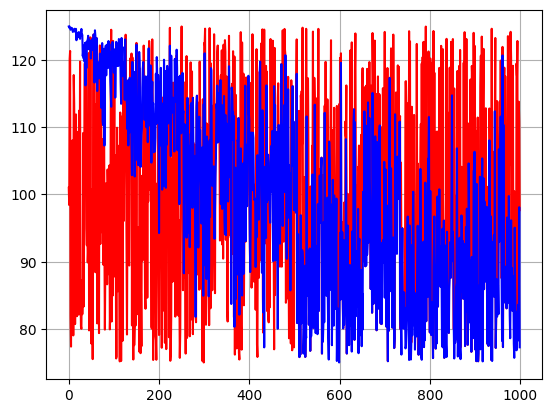

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.uniform(75,125,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
Time=Heapify(Sort)   # MaxHeapify
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
SortingTime.append(["Heapify (Max)","n","1",Time,S1-S0])

***
##Traverse through Heap

###`PrintHeap(ls,index=0)`

In [ ]:
def PrintHeap(ls,index=0):
  # Time: O(n)
  # Space: O(log(n))
  print(ls[index])
  Ch1=index*2+1
  Ch2=index*2+2
  # 1 Child
  if Ch1<len(ls) and Ch2>=len(ls):
    PrintHeap(ls,Ch1)
  # 2 Children
  if Ch2<len(ls):
    PrintHeap(ls,Ch1)
    PrintHeap(ls,Ch2)

In [ ]:
ls=[0,1,2,3,4,5,6,7]
PrintHeap(ls)

0
1
3
7
4
2
5
6


###`IsHeap(ls,index=0)`

In [ ]:
def IsHeap(ls,index=0):
  # Check if the list is the max heap or not.
  # Time: O(n)
  # Space: O(log(n))
  Ch1=index*2+1
  Ch2=index*2+2
  # 1 Child
  if Ch1<len(ls) and Ch2>=len(ls):
    if ls[index]<ls[Ch1]:
      return False
    else:
      return IsHeap(ls,Ch1)
  # 2 Children
  elif Ch1<len(ls) and Ch2<len(ls):
    if ls[index]<ls[Ch1] or ls[index]<ls[Ch2]:
      return False
    else:
      return IsHeap(ls,Ch1) and IsHeap(ls,Ch2)
  # no Children
  else:
    return True

In [ ]:
t = [7, 4, 6, 3, 0, 5, 2, 1]
f = [7, 4, 6, 3, 0, 5, 21, 1]
# f = [ 0, 1, 2, 3, 4, 5, 6, 7]
print(IsHeap(t))
print(IsHeap(f))

True
False


###`Path(ls,index)`

In [ ]:
def MinPath(ls,index):
  # Greedy recursively select min element
  # Time: O(log(n))
  # Space: O(log(n))
  path=[ls[index]]
  Ch1=index*2+1
  Ch2=index*2+2
  # 1 Child
  if Ch2>=len(ls) and Ch1<len(ls):
    path+=MinPath(ls,Ch1)
  # 2 Children
  if Ch2<len(ls):
    if ls[Ch1]>ls[Ch2]:
      path+=MinPath(ls,Ch2)
    else:
      path+=MinPath(ls,Ch1)
  return path

In [ ]:
Sort[10:20]

[124.28231151024488,
 124.31443280674495,
 124.52518290165074,
 124.65054643597978,
 124.19449011158667,
 124.22583097526888,
 124.6327558536914,
 122.94280677511065,
 123.952101704673,
 123.83030793317272]

In [ ]:
path=MinPath(Sort,0)
print(path)

[124.98703412762225, 124.80611628606157, 124.49997790519703, 124.17746318008226, 123.83030793317272, 118.78354723510466, 107.27633033857138, 104.08639238882611, 103.6751568310984, 76.39463408570903]


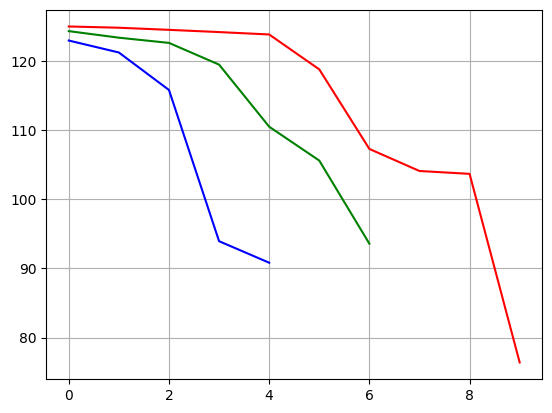

In [ ]:
path=MinPath(Sort,0)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='red')
path=MinPath(Sort,11)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='green')
path=MinPath(Sort,42)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='blue')
plt.grid()

###`Orgin(ls,index)`

In [ ]:
def Origin(ls,index):
  # Time: O(log(n))
  # Space: O(log(n))
  path=[ls[index]]
  if index>0 and index%2==0:
    path+=Origin(ls,int((index-2)/2))
  if index>0 and index%2==1:
    path+=Origin(ls,int((index-1)/2))
  return path

In [ ]:
print(Origin(Sort,0))

[124.98703412762225]


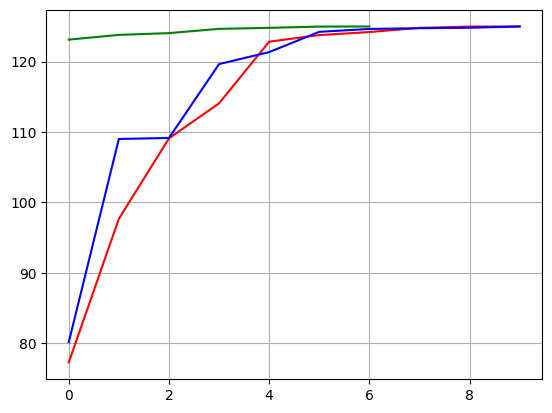

In [ ]:
path=Origin(Sort,999)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='red')
path=Origin(Sort,111)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='green')
path=Origin(Sort,542)
X=np.arange(0,len(path),1)
plt.plot(X,np.array(path),color='blue')
plt.grid()

***
##Heap Sort

###How does Heap Sort works?

1. Convert the `ls` list in to heap with `Heapify(ls)` with $O(n)$ time
2. Starting the loop with $O(n\log(n))$ time
 * 2.1 Swap the first element (with is always the largest element) with the `m-i` th element.
 * 2.2 Applying `LogHeap(ls,0,limit=i+1)` with $O(\log(n))$ time

###Total Complexity
* Time: $O(n\log(n))$
* Space: $O(1)$

In [ ]:
def HeapSort(ls):
  # Time: O(n log(n))
  # Space: O(1)
  # https://youtu.be/2DmK_H7IdTo?si=Z1_sMHMHQp8a27IX
  # 1. Convert list into MaxHeap with O(n) time
  Heapify(ls)
  n=len(ls)
  m=n-1
  # Loop use O(n) time
  for i in range(m):
    # 2. Swap the first with the m-i th last element
    First=ls[0]
    ls[0]=ls[m-i]
    ls[m-i]=First
    limit=i+1
    # 3. Apply LogHeap with O(log(n)) time
    LogHeap(ls,0,limit)

###Implementation

In [ ]:
def BecomingTheLastNames(ls):
  # https://youtu.be/zsiJ4Hfx_sI?si=Uj_O6ikieXEMSfQa
  # Time: O(1)
  # Space: O(1)
  leafs=int(len(ls)/2)
  if len(ls)%2==1:
    leafs=int((len(ls)+1)/2)
  return len(ls)-leafs

In [ ]:
def LogHeap(ls,index,limit=0):
  # In this case, it is Max Heapify.
  # Time: O(log(n))
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  LastNode=len(ls)-limit
  if Ch1<LastNode and Ch2>=LastNode:
    if ls[Ch1]<ls[index]:
      pass
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
  # 2 Children
  elif Ch2<LastNode:
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      pass
    elif ls[Ch1]>=ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      LogHeap(ls,Ch1,limit)
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      LogHeap(ls,Ch2,limit)
    else:
      pass
  # No Children
  else:
    pass

In [ ]:
def Heapify(ls):
  # Time: O(n)
  # Space: O(1)
  # The time complexity is O(n) because for large number input
  # the number of total iterations and input can be approximated as 2^h
  # where h = height. Thus the time complexity is linear.
  Parent=BecomingTheLastNames(ls)
  while Parent>-1:
    LogHeap(ls,Parent)
    Parent-=1

In [ ]:
arr=[44,35,47,63,244,122,5453,23,478,564,88]
Heapify(arr)
n=len(arr)
m=n-1
for i in range(m):
  Temp=arr[0]
  arr[0]=arr[m-i]
  arr[m-i]=Temp
  limit=i+1
  LogHeap(arr,0,limit)
print(arr)

[23, 35, 44, 47, 63, 88, 122, 244, 478, 564, 5453]


In [ ]:
def HeapSort(ls):
  # Time: O(n log(n))
  # Space: O(1)
  # https://youtu.be/2DmK_H7IdTo?si=Z1_sMHMHQp8a27IX
  # 1. Convert list into MaxHeap with O(n) time
  Heapify(ls)
  n=len(ls)
  m=n-1
  # Loop use O(n) time
  for i in range(m):
    # 2. Swap the first with the m-i th last element
    First=ls[0]
    ls[0]=ls[m-i]
    ls[m-i]=First
    limit=i+1
    # 3. Apply LogHeap with O(log(n)) time
    LogHeap(ls,0,limit)

In [ ]:
ls=[65,7,-13,-89,-159,-30,-116]
HeapSort(ls)
print(ls)

[-159, -116, -89, -30, -13, 7, 65]


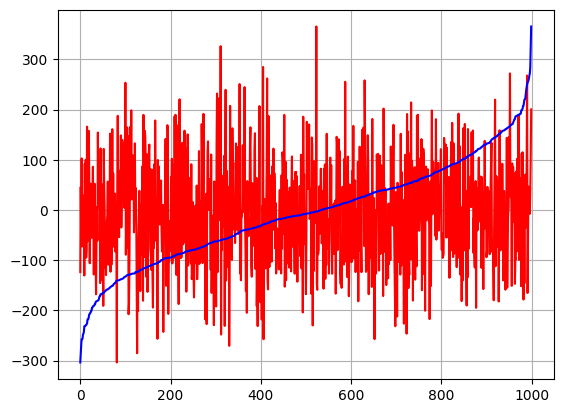

In [ ]:
X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
HeapSort(Sort)
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

###Time Evaluation

In [ ]:
def BecomingTheLastNames(ls):
  # https://youtu.be/zsiJ4Hfx_sI?si=Uj_O6ikieXEMSfQa
  # Time: O(1)
  # Space: O(1)
  leafs=int(len(ls)/2)
  if len(ls)%2==1:
    leafs=int((len(ls)+1)/2)
  return len(ls)-leafs

In [ ]:
def LogHeap(ls,index,limit=0,time=1):
  # In this case, it is Max Heapify.
  # Time: O(log(n))
  # Space: O(1)
  # 1 Child
  Ch1=index*2+1
  Ch2=index*2+2
  LastNode=len(ls)-limit
  if Ch1<LastNode and Ch2>=LastNode:
    if ls[Ch1]<ls[index]:
      pass
    if ls[Ch1]>ls[index]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
    return time
  # 2 Children
  elif Ch2<LastNode:
    if ls[index]>ls[Ch1] and ls[index]>ls[Ch2]:
      pass
    elif ls[Ch1]>=ls[Ch2]:
      Temp=ls[Ch1]
      ls[Ch1]=ls[index]
      ls[index]=Temp
      time+=LogHeap(ls,Ch1,limit)
    elif ls[Ch1]<ls[Ch2]:
      Temp=ls[Ch2]
      ls[Ch2]=ls[index]
      ls[index]=Temp
      time+=LogHeap(ls,Ch2,limit)
    else:
      pass
    return time
  # No Children
  else:
    return time

In [ ]:
def Heapify(ls):
  # Time: O(n)
  # Space: O(1)
  # The time complexity is O(n) because for large number input
  # the number of total iterations and input can be approximated as 2^h
  # where h = height. Thus the time complexity is linear.
  Parent=BecomingTheLastNames(ls)
  time=Parent
  while Parent>-1:
    time+=LogHeap(ls,Parent)
    Parent-=1
  return time

In [ ]:
def HeapSort(ls):
  # Time: O(n log(n))
  # Space: O(1)
  time=Heapify(ls)
  n=len(ls)
  m=n-1
  # Loop use O(n) time
  for i in range(m):
    First=ls[0]
    ls[0]=ls[m-i]
    ls[m-i]=First
    limit=i+1
    # LogHeap use O(log(n)) time
    time+=LogHeap(ls,0,limit)+1
  return time

In [ ]:
ls=[65,7,-13,-89,-159,-30,-116]
print('time',HeapSort(ls))
print(ls)

time 24
[-159, -116, -89, -30, -13, 7, 65]


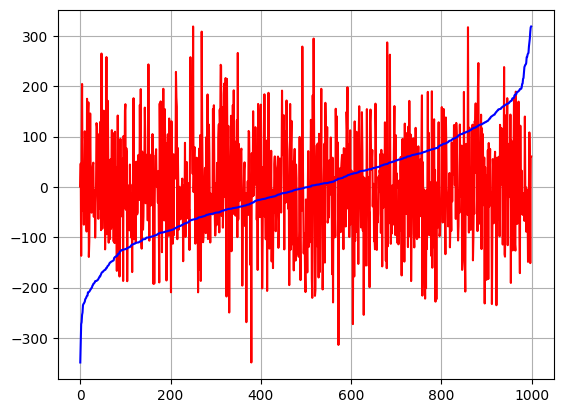

In [ ]:
import time

X=np.arange(0,Size,1)
Random = np.random.normal(Mean,Std,Size)
plt.plot(X,Random,color='red')
Sort=list(Random)
S0 = time.time()
Time=HeapSort(Sort)
S1 = time.time()
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
(Sort==np.sort(Random)).all()

True

In [ ]:
Time

11088

In [ ]:
SortingTime.append(["HeapSort","n log(n)","1",Time,S1-S0])


***
#Reverse Order

In [ ]:
def ReverseOrder(ls):
  # Time: O(n)
  # Space: O(1)
  time=0
  for i in range(math.floor(len(ls)/2)):
    time+=1
    t=ls[i]
    ls[i]=ls[len(ls)-i-1]
    ls[len(ls)-i-1]=t
  return time

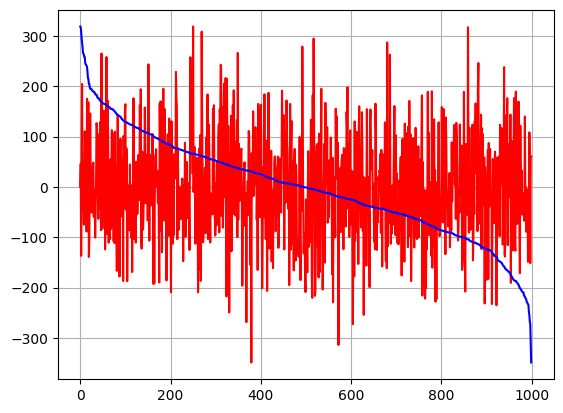

In [ ]:
import time

plt.plot(X,Random,color='red')
S0 = time.time()
Time=ReverseOrder(Sort)
S1 = time.time()
plt.plot(X,Sort,color='blue')
plt.grid()

In [ ]:
SortingTime.append(["ReverseOrder","n","1",Time,S1-S0])

***
#Evaluation

In [ ]:
df = pd.DataFrame(SortingTime, columns=['Algorithm','BigO-Time','BigO-Space','CountLoop','RealTime'])

In [ ]:
Size

1000

In [ ]:
df

,Algorithm,BigO-Time,BigO-Space,CountLoop,RealTime
0,BubbleSort,n^2,1,499500,0.000147
1,InsertionSort,n^2,1,499500,0.045998
2,SelectionSort,n^2,1,501500,0.000162
3,MergeSort,n log(n),n,9976,0.000200
4,QuickSort,n log(n) - n^2,log(n) - n,20163,0.000158
5,RadixSort,n * k,n,30562,0.019423
6,Heapify (Max),n,1,1750,0.000255
7,HeapSort,n log(n),1,11088,0.012456
8,ReverseOrder,n,1,500,0.000602


In [ ]:
SortAlgorithm = df[df[df.columns[0]].str.contains('Sort')]
SortAlgorithm.rename({'Algorithm': 'Sorting Method'}, axis=1, inplace=True)
# https://www.geeksforgeeks.org/select-rows-that-contain-specific-text-using-pandas/
# https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

<ipython-input-282-642c6844a251>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SortAlgorithm.rename({'Algorithm': 'Sorting Method'}, axis=1, inplace=True)


In [ ]:
SortAlgorithm

,Sorting Method,BigO-Time,BigO-Space,CountLoop,RealTime
0,BubbleSort,n^2,1,499500,0.000147
1,InsertionSort,n^2,1,499500,0.045998
2,SelectionSort,n^2,1,501500,0.000162
3,MergeSort,n log(n),n,9976,0.000200
4,QuickSort,n log(n) - n^2,log(n) - n,20163,0.000158
5,RadixSort,n * k,n,30562,0.019423
7,HeapSort,n log(n),1,11088,0.012456


***
#Common Coding Mistake

##Array Index Mistake

**Description**

The index of element in list (and array) always start with `0` and end with `len(ls)-1`. The length of list `ls` is always `len(ls)`. If you confuse with the index of element or length of the list, then one advice is to initialize 2 variable that represent maximum index of the element and length of the list.

###Example No.1, Loop

In [ ]:
N=5  # len(ls)
M=N-1 # len(ls)-1 = Maximum Index
#--------------------------------------------------
print('\nFor Loop Forward')
for i in range(N):
  print('ls['+str(i)+']')
#--------------------------------------------------
print('\nFor Loop Backward')
for i in range(N):
  print('ls['+str(M-i)+']')
#--------------------------------------------------
i=0
print('\nWhile Loop Forward')
while i<N:
  print('ls['+str(i)+']')
  i+=1
#--------------------------------------------------
i=M
print('\nWhile Loop Backward')
while i>-1:
  print('ls['+str(i)+']')
  i-=1


For Loop Forward
ls[0]
ls[1]
ls[2]
ls[3]
ls[4]

For Loop Backward
ls[4]
ls[3]
ls[2]
ls[1]
ls[0]

While Loop Forward
ls[0]
ls[1]
ls[2]
ls[3]
ls[4]

While Loop Backward
ls[4]
ls[3]
ls[2]
ls[1]
ls[0]


###Example No.2, Quick Sort

In [ ]:
def QuickSort(ls,Start=0,Stop=None):
  # Time: O(n log(n)) - O(n^2)
  # Space: O(log(n)) - O(n)
  if Stop==None:
    Stop=len(ls)-1
  if Start<Stop:
    Index=Partition(ls,Start,Stop)
    QuickSort(ls,Start,Index-1)
    QuickSort(ls,Index+1,Stop)

def Partition(ls,Start=0,Stop=None):
  # Time: O(n)
  # Space: O(1)
  if Stop==None:
    Stop=len(ls)-1
  # 1. Randomly Select Pivot, so that there is less chance that the recursive tree is unbalance.
  Random=np.random.randint(Start,Stop,1)[0]
  temp=ls[Stop]
  ls[Stop]=ls[Random]
  ls[Random]=temp
  Pivot=ls[Stop]
  i=Start
  j=Start
  # 2. Loop and swap the value of ls[i] and ls[j]
  while i<=Stop:
    if ls[i]<Pivot:
      while j<i and ls[j]<=Pivot:
        j+=1
      if ls[j]>Pivot:
        Temp=ls[i]
        ls[i]=ls[j]
        ls[j]=Temp
    i+=1
  # i-=1 because the last index of ls is always `len(ls)-1`
  i-=1
  # 3. Find the position of pivot.
  while j<i and ls[j]<Pivot:
    j+=1
  Temp=ls[i]
  ls[i]=ls[j]
  ls[j]=Temp
  return j

###Example No.3, HeapSort

In [ ]:
def HeapSort(ls):
  # Time: O(n log(n))
  # Space: O(1)
  # https://youtu.be/2DmK_H7IdTo?si=Z1_sMHMHQp8a27IX
  # 1. Convert list into MaxHeap with O(n) time
  Heapify(ls)
  n=len(ls)
  m=n-1     # the last index of ls
  for i in range(m):
    # 2. Swap the first with the m-i th last element
    First=ls[0]
    ls[0]=ls[m-i] # The i-th last index of ls
    ls[m-i]=First
    limit=i+1     # The size of the sorted list
    # 3. Apply LogHeap with O(log(n)) time
    LogHeap(ls,0,limit) # If the function does not works as expected, then try to print the loop, and then debug the LogHeap

##Accidentally use Memory Space

**Description**

If you initialize variable `arr=ls` or `return ls`, you add unnecessary space complexity to the algorithm that you implement, because you copy the `ls`.

**Wrong**

In [ ]:
def SwapElement(ls,i,j):
  temp=ls[i]
  ls[i]=ls[j]
  ls[j]=temp
  return ls

**Wrong**

In [ ]:
def SwapElement(ls,i,j):
  var=ls
  temp=var[i]
  var[i]=var[j]
  var[j]=temp
  return var

**Right**

In [ ]:
def SwapElement(ls,i,j):
  temp=ls[i]
  ls[i]=ls[j]
  ls[j]=temp

***
#Reference
* https://youtu.be/RfXt_qHDEPw?si=dBGgoW73K6Xeg3-l